## seaborn 빈도그래프2

###### 데이터의 빈도를 표현하는 다른 방법들
###### `statmodels` 패키지의 설치가 필요하다.

### #01. 작업준비
#### 1. 패키지 참조

In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic

ModuleNotFoundError: No module named 'matplotlib'

#### 2. 데이터 가져오기 및 전처리과정

In [2]:
# 데이터 가져오기
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")

# 데이터타입을 범주화로 바꾸기
df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. 그래프 전역 설정

In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

### #02. Countplot
- 데이터의 빈도를 표현하는 가장 간편한 방법
-  `catplot()`에서 `kind`값이 `count`로 고정되어 있는 형태

#### 1. X축에 설정된 집단별 빈도수 확인

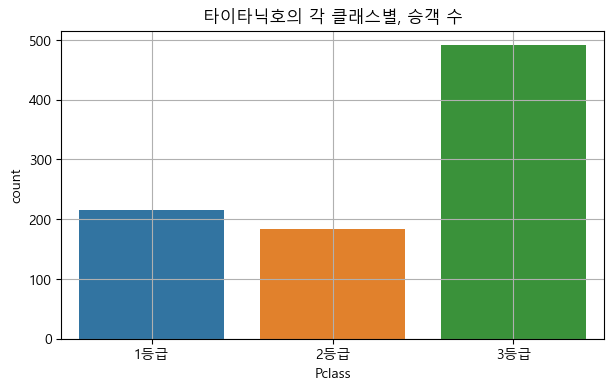

In [4]:
sb.countplot(data=df, x="Pclass")
    # pclass는 범주형 데이터이므로 따로 y축을 설정할 필요가 없다. 
plt.title('타이타닉호의 각 클래스별, 승객 수')
plt.xticks([0,1,2],['1등급','2등급','3등급'])
    #x좌표는 무조건 0부터 시작한다. -> ex. xticks([0,1,2],['1등급','2등급','3등급'])
plt.grid()
plt.show()
plt.close()

#### 2. 범주 추가

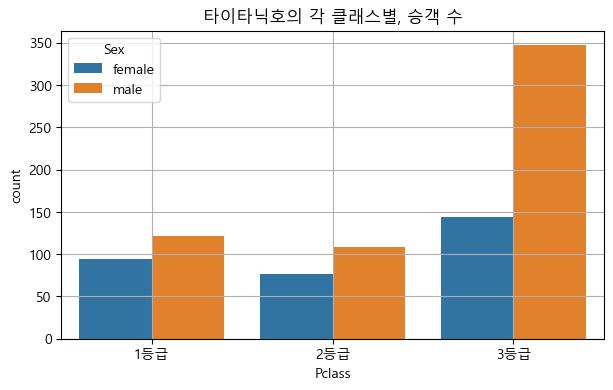

In [5]:
# hue파라미터 (각 클래스별, 성별 => 승객 수)
sb.countplot(data=df, x="Pclass", hue='Sex') 
plt.title('타이타닉호의 각 클래스별, 승객 수')
plt.xticks([0,1,2],['1등급','2등급','3등급'])
plt.grid()
plt.show()
plt.close()

### #03. 모자이크 그래프
- 막대그래프 외에도 변량이 모두 범주형인 다차원 데이터를 시각화할 때는 모자이크 그래프(mosaic plot)를 사용하기도 한다.
- 모자이크 그래프는 그룹 내의 데이터 백분율을 보여주는 누적 막대그래프이다.
- 모자이크 그래프는 변수가 3개 이상일 때도 사용할 수 있다.
- 모자이크 그래프는 `statsmodels.graphics.mosaicplot`패키지의 `mosaic`함수를 이용해서 그린다.

#### 1. 한가지 변수에 대한 비율 표시

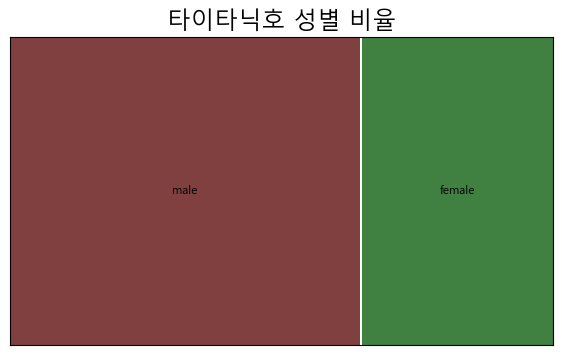

In [8]:
# 모자이크 그래프 mosaic(df, ['필드명'])
mosaic(df, ['Sex'], axes_label=False)

plt.title('타이타닉호 성별 비율', fontsize=17)
plt.show()
plt.close()

#### 2. 두가지 변수에 대한 비율 표시

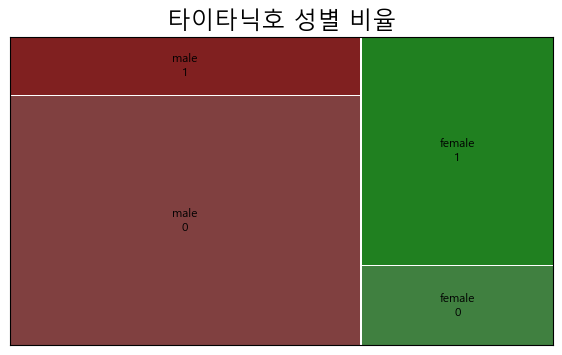

In [9]:
mosaic(df,['Sex','Survived'], axes_label=False)

plt.title('타이타닉호 성별 비율', fontsize=17)
plt.show()
plt.close()

#### 3. 색상과 표시 라벨 변경하기

In [16]:
def getColor(key):
    print(key)
    if '1' in key:
        color = 'teal'
    else:
        color = 'lightgrey'
    return {'color': color}

In [17]:
def getLabel(key):
    if 'male' in key:
        sex = '남자'
    else:
        sex = '여자'
    
    if '0' in key:
        sur = '사망'
    else:
        sur = '생존'
    
    label = "%s/%s" % (sex, sur)
    print(key, "->", label)
    return label

('male', '0')
('male', '0') -> 남자/사망
('male', '1')
('male', '1') -> 남자/생존
('female', '0')
('female', '0') -> 여자/사망
('female', '1')
('female', '1') -> 여자/생존


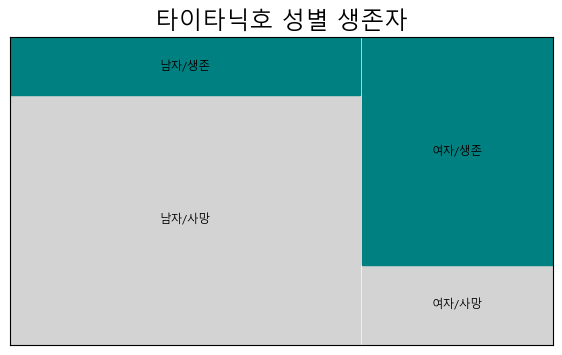

In [18]:
mosaic(df, ['Sex', 'Survived'], axes_label=False,
       properties=getColor, labelizer=getLabel) #properties = : 색상변경 파라미터

plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

##### 람다식 사용 
>  lambda파라미터 이름:리턴값


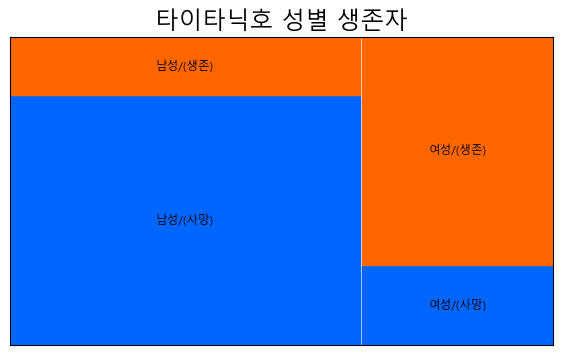

In [19]:
mosaic(df, ['Sex', 'Survived'], axes_label=False,
       properties=lambda key : {'color':'#ff6600' if '1' in key else '#0066ff'},
        labelizer=lambda key : {('female','1'):'여성/(생존)',('female','0'): '여성/(사망)',
                                ('male','1'):'남성/(생존)', ('male','0'):'남성/(사망)'}[key]) 

plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

### #04. 집단별 산점도 그래프

In [20]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (20,10)

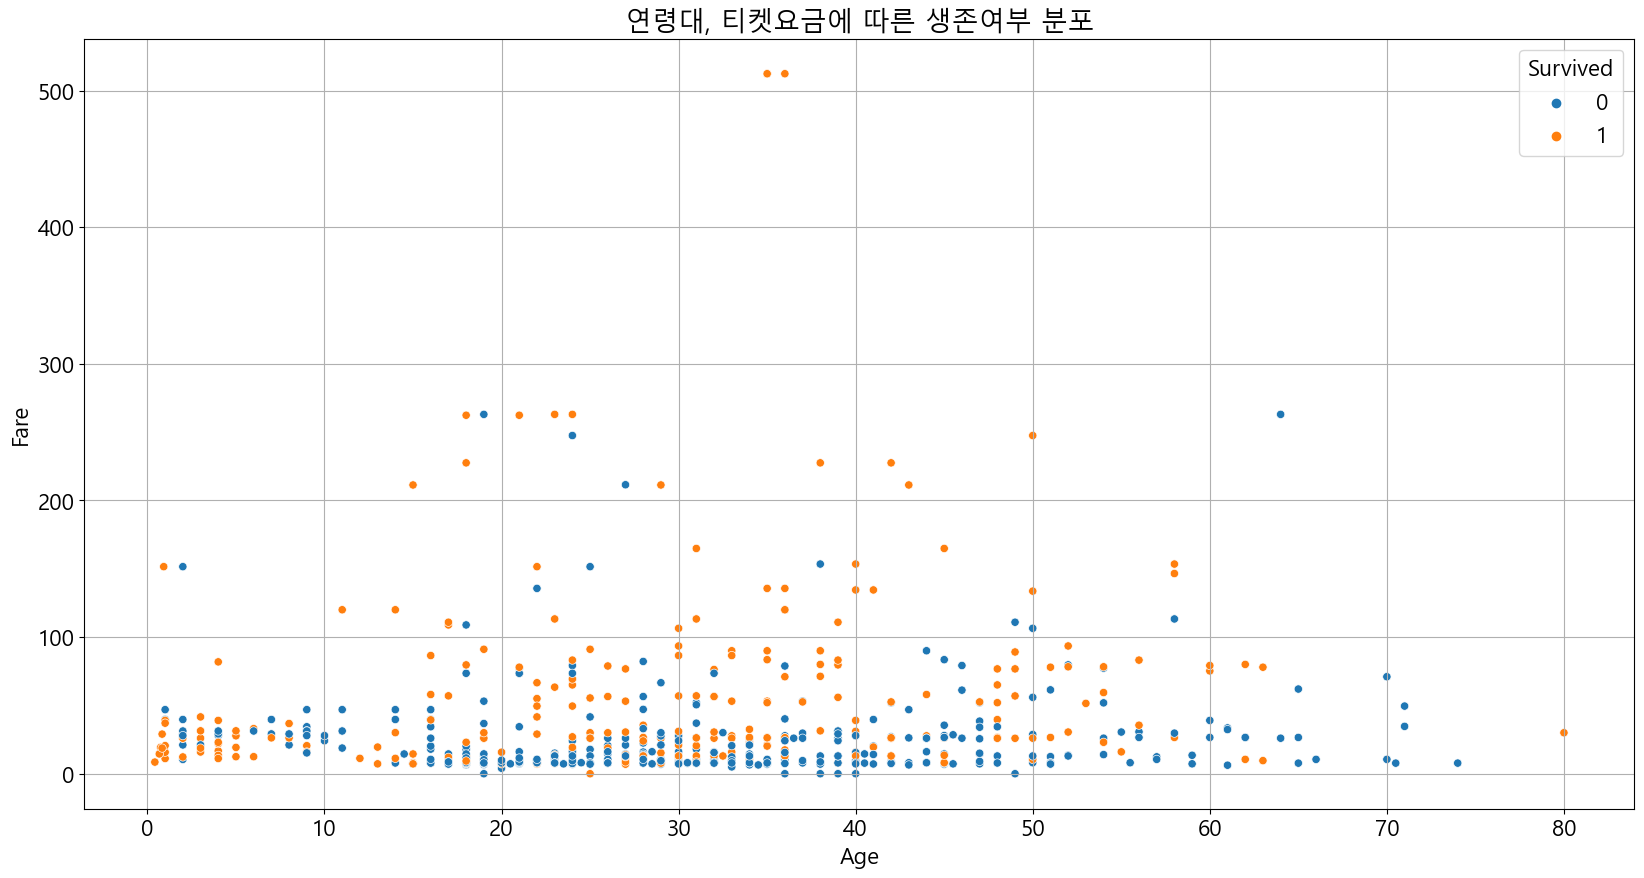

In [22]:
sb.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title("연령대, 티켓요금에 따른 생존여부 분포")
plt.grid()
plt.show()

###### > 산점도그래프 분석
###### > fare요금이 높을 수록 생존율이 올라갔다.
###### > 나이가 어릴수록 주황색(생존1)분포 높아 = 생존율이 높다.

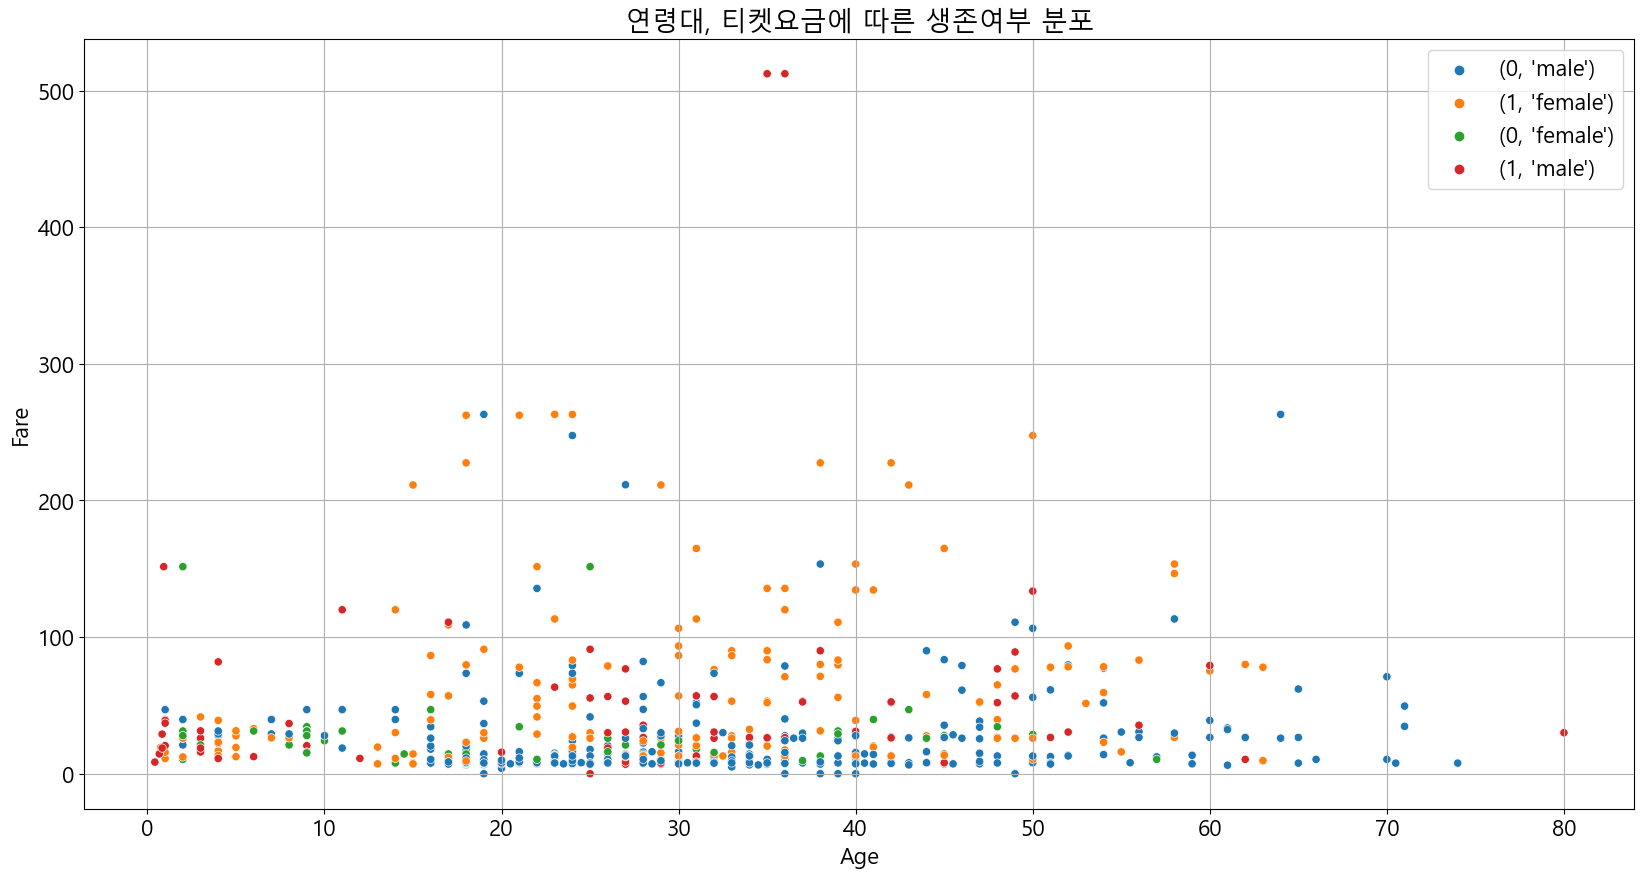

In [23]:
sb.scatterplot(data=df, x='Age', y='Fare', hue=df[['Survived','Sex']].apply(tuple,axis=1))
plt.title("연령대, 티켓요금에 따른 생존여부 분포")
plt.grid()
plt.show()

# hue=df[['Survived','Sex']].apply(tuple,axis=1))?? 

### #05. 산점도 행렬
###### 각 변수를 교차로 산점도 그래프를 나열한 상태
###### 범주형 데이터는 자동으로 제외된다.
###### 왼쪽 상단에서 오른쪽 하단으로 중앙에는 각 데이터의 히스토그램이 표시된다.
###### `diag_kind='kde'` 파라미터를 추가하면 히스토그램 대신 커널밀도추정곡선을 표시한다.

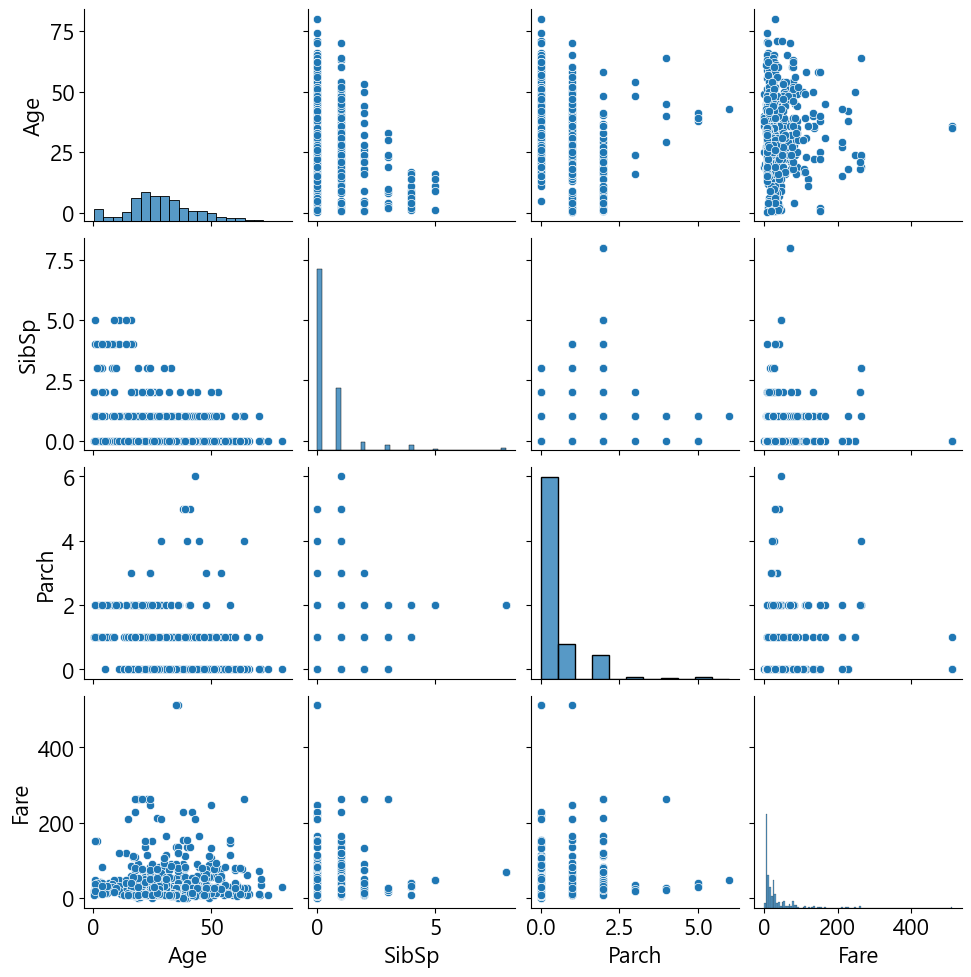

In [24]:
sb.pairplot(df)
plt.show()
plt.close()